<a href="https://colab.research.google.com/github/kazarohan/DataScience/blob/master/CancerPrediction_LogisticTRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 

In [26]:
data = pd.read_csv("data.csv") 
  
print (data.head) 

<bound method NDFrame.head of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>


In [27]:
data.drop(['Unnamed: 32', 'id'], axis = 1) 
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] 


In [28]:
data.head(n=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [29]:
y = data.diagnosis.values 
x_data = data.drop(['diagnosis'], axis = 1) 

In [30]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values 


In [31]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( 
	x, y, test_size = 0.15, random_state = 42) 

x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 

print("x train: ", x_train.shape) 
print("x test: ", x_test.shape) 
print("y train: ", y_train.shape) 
print("y test: ", y_test.shape) 


x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


Code : Weight and bias



In [32]:
def initialize_weights_and_bias(dimension): 
    w = np.full((dimension, 1), 0.01) 
    b = 0.0
    return w, b

Code : Sigmoid Function – calculating z value.

In [34]:
# z = np.dot(w.T, x_train)+b 
def sigmoid(z): 
    y_head = 1/(1 + np.exp(-z)) 
    return y_head 

Code : Forward-Backward Propogation

In [37]:
def forward_backward_propagation(w, b, x_train, y_train): 
	z = np.dot(w.T, x_train) + b 
	y_head = sigmoid(z) 
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head) 
	# x_train.shape[1] is for scaling 
	cost = (np.sum(loss)) / x_train.shape[1]	 

	# backward propagation 
	derivative_weight = (np.dot(x_train, ( 
		(y_head - y_train).T))) / x_train.shape[1] 
	derivative_bias = np.sum( 
		y_head-y_train) / x_train.shape[1]				 
	gradients = {"derivative_weight": derivative_weight, 
				"derivative_bias": derivative_bias} 
	return cost, gradients 

Code : Updating Parameters



In [38]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion): 
    cost_list = [] 
    cost_list2 = [] 
    index = [] 
  
    # updating(learning) parameters is number_of_iterarion times 
    for i in range(number_of_iterarion): 
        # make forward and backward propagation and find cost and gradients 
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train) 
        cost_list.append(cost) 
  
        # lets update 
        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"] 
        if i % 10 == 0: 
            cost_list2.append(cost) 
            index.append(i) 
            print ("Cost after iteration % i: % f" %(i, cost)) 
  
    # update(learn) parameters weights and bias 
    parameters = {"weight": w, "bias": b} 
    plt.plot(index, cost_list2) 
    plt.xticks(index, rotation ='vertical') 
    plt.xlabel("Number of Iterarion") 
    plt.ylabel("Cost") 
    plt.show() 
    return parameters, gradients, cost_list 


Code : Predictions



In [39]:
def predict(w, b, x_test): 
    # x_test is a input for forward propagation 
    z = sigmoid(np.dot(w.T, x_test)+b) 
    Y_prediction = np.zeros((1, x_test.shape[1])) 
  
    # if z is bigger than 0.5, our prediction is sign one (y_head = 1), 
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0), 
    for i in range(z.shape[1]): 
        if z[0, i]<= 0.5: 
            Y_prediction[0, i] = 0
        else: 
            Y_prediction[0, i] = 1
  
    return Y_prediction 

Code : Logistic Regression



Cost after iteration  0:  nan
Cost after iteration  10:  nan
Cost after iteration  20:  nan
Cost after iteration  30:  nan
Cost after iteration  40:  nan
Cost after iteration  50:  nan
Cost after iteration  60:  nan
Cost after iteration  70:  nan
Cost after iteration  80:  nan
Cost after iteration  90:  nan


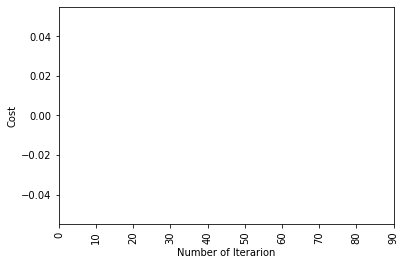

train accuracy: 37.267080745341616 %
test accuracy: 37.2093023255814 %


In [40]:
def logistic_regression(x_train, y_train, x_test, y_test,  
                        learning_rate,  num_iterations): 
  
    dimension = x_train.shape[0] 
    w, b = initialize_weights_and_bias(dimension) 
      
    parameters, gradients, cost_list = update( 
        w, b, x_train, y_train, learning_rate, num_iterations) 
      
    y_prediction_test = predict( 
        parameters["weight"], parameters["bias"], x_test) 
    y_prediction_train = predict( 
        parameters["weight"], parameters["bias"], x_train) 
  
    # train / test Errors 
    print("train accuracy: {} %".format( 
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100)) 
    print("test accuracy: {} %".format( 
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)) 
      
logistic_regression(x_train, y_train, x_test,  
                    y_test, learning_rate = 1, num_iterations = 100)  


In [1]:
from sklearn import linear_model 
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150) 


In [2]:
S = logreg.fit(x_train.T, y_train.T)

NameError: ignored

In [45]:
# print("test accuracy: {} ".format( 
#     logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T))) 
print("train accuracy: {} ".format( 
    logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T))) 

ValueError: ignored